# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
#table = soup.find('//div[@class="lister-item mode-advanced"]')
table = soup.find('div',attrs={'id':'main'})
print(table.prettify()[1:500])

div id="main">
 <div class="article">
  <h1 class="header">
   Released between 2021-01-01 and 2021-12-31
(Sorted by Popularity Ascending)
  </h1>
  <div class="nav">
   <br class="clear"/>
   <div class="display-mode float-right">
    View Mode:
    <a class="compact" href="/search/title/?release_date=2021-01-01,2021-12-31&amp;view=simple">
     Compact
    </a>
    <span class="ghost">
     |
    </span>
    <a class="detailed" href="/search/title/?release_date=2021-01-01,2021-12-31&amp;view=


Finding row length.

In [5]:
row = table.find_all('div',attrs={'class':'lister-item mode-advanced'})
row_length = len(row)
row_length

50

Do the scrapping process here (please change this markdown with your explanation)

In [6]:
import math

In [7]:
test = table.find('div',attrs={'class':'desc'}).text
total_film=int(test[9:16].replace(',',""))
page_count=math.ceil((total_film/row_length))
page_count

15542

In [78]:
temp = [] #initiating a tuple


for i in range(0, row_length):
    
    # untuk mendapatkan judul film
    titles=table.select('h3.lister-item-header a')[i].text
    
    # untuk mendapatkan rating imdb

    imdbs=table.select('div.ratings-bar div strong')[i].text

    # untuk mendapatkan metascores

    try :
        metascores=table.select('div[class="ratings-bar"]')[i].text
        metascores=metascores.split('\n')[35].strip()

    except:
        metascores=0

    # untuk mendapatkan jumlah votes

    votes=table.select('p[class="sort-num_votes-visible"]')[i].text
    votes=votes.split('\n')[2]

        
    temp.append((titles,imdbs,metascores,votes))
temp


[('CODA', '8.1', '74', '88,340'),
 ('The Power of the Dog', '6.9', '89', '148,492'),
 ('King Richard', '7.5', '76', '79,137'),
 ('Dune: Part One', '8.1', '74', '535,814'),
 ('The Eyes of Tammy Faye', '6.6', '55', '22,769'),
 ('Spider-Man: No Way Home', '8.5', '71', '573,677'),
 ('West Side Story', '7.3', '85', '63,929'),
 ('Nightmare Alley', '7.1', '70', '105,071'),
 ('Licorice Pizza', '7.4', '90', '71,266'),
 ('Encanto', '7.3', '75', '179,845'),
 ('Belfast', '7.3', '75', '52,415'),
 ('Doraibu mai kâ', '7.6', '91', '32,338'),
 ('1883', '9.0', 0, '46,512'),
 ("Don't Look Up", '7.2', '49', '480,436'),
 ('Verdens verste menneske', '7.9', '90', '34,726'),
 ('tick, tick...BOOM!', '7.5', '74', '91,524'),
 ("The King's Man", '6.3', '44', '108,070'),
 ('Sing 2', '7.5', '49', '42,454'),
 ('Spencer', '6.7', '76', '53,292'),
 ('Boiling Point', '7.5', '73', '13,174'),
 ('The Lost Daughter', '6.7', '86', '53,635'),
 ('Free Guy', '7.2', '62', '322,780'),
 ('House of Gucci', '6.7', '59', '95,504'),
 

## Creating data frame & Data wrangling

Put the array into dataframe

In [90]:
import pandas as pd
df=pd.DataFrame(temp, columns = ('title','imdb','metascores','votes'))
#df = pd.DataFrame({'title' : title ,'imdb':imdb, 'metascores':metascore,'votes':vote})
df.head()

,title,imdb,metascores,votes
0,CODA,8.1,74,"88,340"
1,The Power of the Dog,6.9,89,"148,492"
2,King Richard,7.5,76,"79,137"
3,Dune: Part One,8.1,74,"535,814"
4,The Eyes of Tammy Faye,6.6,55,"22,769"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

    - After checking the data types . we need to change imdb rating to dtype ('float64') and change metascores and votes to {'int64'}
    - And also based on this scraping purpose , we want to make a plot for top 7 popular movie in 2021, i decide to make a several data frame to see top 7 movie based on this criteria :
     -> IMDB Rating
     -> Metascore
     -> Votes

     and sort them by it's value , descending

In [91]:
df.dtypes

title         object
imdb          object
metascores    object
votes         object
dtype: object

In [92]:
df['imdb']=df['imdb'].astype('float64')
df['metascores']=df['metascores'].astype('int64')
df['votes']=df['votes'].str.replace(',',"")
df['votes']=df['votes'].astype('int64')

In [93]:
df.dtypes

title          object
imdb          float64
metascores      int64
votes           int64
dtype: object

In [94]:
top7_movie_by_metascore=df[['title','metascores']]
top7_movie_by_metascore=top7_movie_by_metascore.sort_values(by='metascores',ascending=False).head(7)
top7_movie_by_metascore

,title,metascores
11,Doraibu mai kâ,91
42,Flugt,91
8,Licorice Pizza,90
14,Verdens verste menneske,90
1,The Power of the Dog,89
47,Madres paralelas,88
34,The Tragedy of Macbeth,87


In [95]:
top7_movie_by_imdb_score=df[['title','imdb']]
top7_movie_by_imdb_score=top7_movie_by_imdb_score.sort_values(by='imdb',ascending=False).head(7)
top7_movie_by_imdb_score

,title,imdb
40,Arcane: League of Legends,9.1
12,1883,9.0
45,Dopesick,8.7
5,Spider-Man: No Way Home,8.5
44,Abbott Elementary,8.3
35,Resident Alien,8.2
0,CODA,8.1


In [96]:
top7_movie_by_votes=df[['title','votes']]
top7_movie_by_votes=top7_movie_by_votes.sort_values(by='votes',ascending=False).head(7)
top7_movie_by_votes

,title,votes
5,Spider-Man: No Way Home,573677
3,Dune: Part One,535814
13,Don't Look Up,480436
27,Zack Snyder's Justice League,370439
48,Shang-Chi and the Legend of the Ten Rings,341221
24,No Time to Die,335228
21,Free Guy,322780


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

    - The purpose of the visualization is to compare movie score and make rating of it so i decide to use bar plot to visualize the Data

In [54]:
import matplotlib.pyplot as plt

(0.0, 10.0)

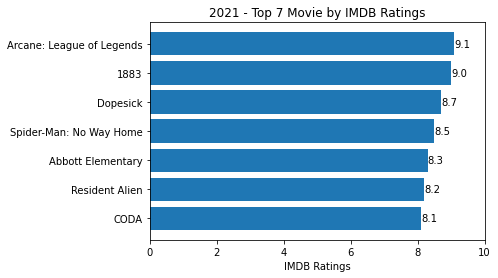

In [66]:
fig,ax = plt.subplots()
barh=ax.barh(y=top7_movie_by_imdb_score['title'],width= top7_movie_by_imdb_score['imdb'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('IMDB Ratings')
ax.set_title('2021 - Top 7 Movie by IMDB Ratings')

# Label with specially formatted floats
ax.bar_label(barh, fmt='%.1f')
ax.set_xlim(right=10)  # adjust xlim to fit labels


(0.0, 100.0)

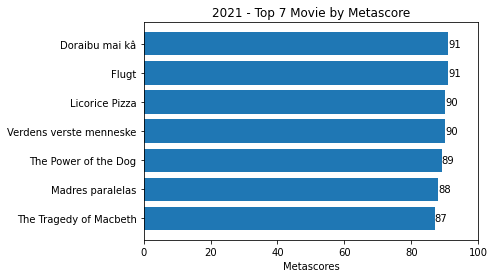

In [68]:
fig,bx = plt.subplots()
barh=bx.barh(y=top7_movie_by_metascore['title'],width= top7_movie_by_metascore['metascores'], align='center')
bx.invert_yaxis()  # labels read top-to-bottom
bx.set_xlabel('Metascores')
bx.set_title('2021 - Top 7 Movie by Metascore')

# Label
bx.bar_label(barh)
bx.set_xlim(right=100)  # adjust xlim to fit labels

(0.0, 650000.0)

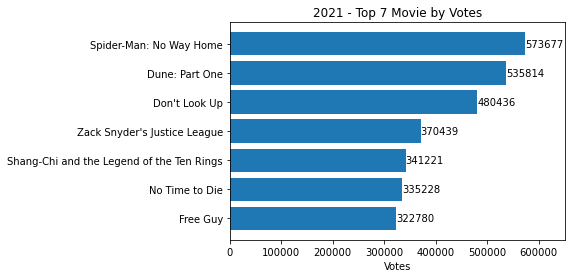

In [70]:
fig,cx = plt.subplots()
barh=cx.barh(y=top7_movie_by_votes['title'],width= top7_movie_by_votes['votes'], align='center')
cx.invert_yaxis()  # labels read top-to-bottom
cx.set_xlabel('Votes')
cx.set_title('2021 - Top 7 Movie by Votes')

# Label with specially formatted floats
cx.bar_label(barh)
cx.set_xlim(right=650000)  # adjust xlim to fit labels

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

The Conclusion of the 3 graph above are :
>The Most Popular Movie based on criteria in 2021 are :
>- Based on IMDB = Arcane: League of Legends with IMDB Rating 9.1
>- Based on Metascore = Doraibu mai kâ and Flugt with Metascore 91
>- Based on Votes = Spider-Man: No Way Home with total votes 573,677

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.